In [1]:
import json
import numpy as np
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/texts.json") as f:
    qid2text = {}
    for line in f:
        obj = json.loads(line)
        qid2text[obj["qid"]] = obj["sentences"]


In [2]:
# text
import scipy.stats as stats
print("# articles", len(qid2text))
num_sentences = []
for qid, texts in qid2text.items():
    num_sentences.append(len(texts))

num_sentences = np.array(num_sentences)
stats.describe(num_sentences)

# articles 6439


DescribeResult(nobs=6439, minmax=(1, 1120), mean=114.45861158564995, variance=18685.293991921033, skewness=2.3452179794159713, kurtosis=6.73862349604012)

In [3]:
idx2statement = {}
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v2/Q5/statements.tsv") as f:
    for line in f:
        idx, s = line.strip().split('\t')
        idx2statement[int(idx)] = eval(s)

from collections import Counter
statement2num_sentences = []
sentence2num_statements = []
num_positive_per_example = []
cnt = 1
with open("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v1/Q5/labels.json") as f:
    for line in f:
        if cnt < 0:
            break
        # cnt -= 1
        obj = json.loads(line)
        e1, e2 = obj["entity_pair"]
        _num_sent = {}
        num_positive_per_example.append(len(obj["positive_labels"]))
        for example in obj["positive_labels"]:
            
            sent_e1 = qid2text[e1][example[0]]
            sent_e2 = qid2text[e2][example[1]]
            
            # print("---")
            # print("sentence_e1:", sent_e1)
            # print("sentence_e2:", sent_e1)
            # _num_statement[f"{e1}_{example[0]}"].add
            # _num_statement[f"{e2}_{example[1]}"] += 1
            for statement_pair in example[2]:
            
                s1_idx = statement_pair[0]
                s2_idx = statement_pair[1] 
              
                # print(idx2statement[s1_idx], idx2statement[s1_idx])
                score = statement_pair[2]
                if s1_idx not in _num_sent:
                    _num_sent[s1_idx] = set()
                if s2_idx not in _num_sent:
                    _num_sent[s2_idx] = set()
                
                _num_sent[s1_idx].add(f"{e1}_{example[0]}")
                _num_sent[s2_idx].add(f"{e2}_{example[0]}")
        for k,v in _num_sent.items():
            statement2num_sentences.append(len(v))
statement2num_sentences = np.array(statement2num_sentences)

print("statement2num_sentences:", stats.describe(statement2num_sentences))

print("count positive sentence pair per example", stats.describe(num_positive_per_example))


KeyError: 'Q23'

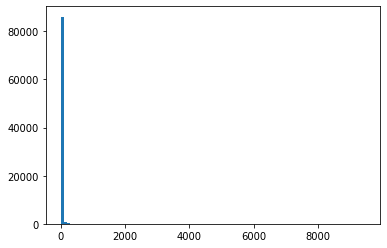

In [8]:
import matplotlib.pyplot as plt
plt.hist(num_positive_per_example, bins=100)
plt.show()

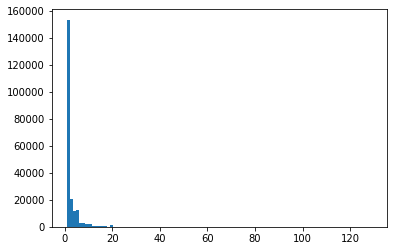

In [17]:
import matplotlib.pyplot as plt
plt.hist(statement2num_sentences, bins=100)
# plt.show()

In [12]:
import matplotlib.pyplot

In [4]:
import json
from pathlib import Path
from collections import Counter

dir_entity_aliases = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikidata_processed/aliases_sorted")

def _lookup_qid2alias(qid):
    if len(qid) < 3:
        table_name = f"Q{int(qid[1]):02d}.tsv"
    else:
        table_name = f"Q{qid[1:3]}.tsv"
    record = None
    with open (dir_entity_aliases / table_name, 'r') as f:
        for line in f:
            if not line.startswith(qid):
                continue
            record = line.strip().split('\t')
            if record[0] == qid:
                return record[1].split('|sep|')
    return None

def _load_property2aliases(path):
    # from the property_aliases table
    pid2aliases = {}
    with open(path, 'r') as f:
        header = f.readline()
        assert header.strip().split('\t') == ["alias", "pid"]
        while True:
            line = f.readline()
            if len(line) == 0:
                break
            alias, pid = line.strip().split('\t')
            if pid not in pid2aliases:
                pid2aliases[pid] = []
            pid2aliases[pid].append(alias)
    return pid2aliases


path_prop_alias = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikidata_processed/property_aliases/0.tsv")
pid2alias = _load_property2aliases(path_prop_alias)
idx2statement = {}
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v1/Q5/statements.tsv") as f:
    for line in f:
        idx, s = line.strip().split('\t')
        idx2statement[idx] = eval(s)
prop2freq = Counter()
statmentpair2freq = {}
prop2statement2freq = {}
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v1/Q5/statement_pairs.tsv") as f:
    for line in f:
        s1, s2, freq = line.strip().split('\t')
        s1 = idx2statement[s1]
        s2 = idx2statement[s2]
        assert s1[1] == s2[1]
        prop2freq[s1[1]] += int(freq)

        pair = (s1[0], s2[0], s1[1], s1[2], s2[2])
        statmentpair2freq[pair] = int(freq)
        if s1[1] not in prop2statement2freq:
            prop2statement2freq[s1[1]] = {}
        prop2statement2freq[s1[1]][pair] = freq

for k,v in list(statmentpair2freq.items())[:50]:
    print(f"{v}, ({_lookup_qid2alias(k[0])[1]}, {pid2alias[k[2]][0]}, {_lookup_qid2alias(k[0])[0]}, {_lookup_qid2alias(k[0])[1]}, {_lookup_qid2alias(k[3])[0]}, {_lookup_qid2alias(k[4])[0]}}")

print("===")

for k,v in prop2freq.most_common(20):
    print(v, k, pid2alias[k][0])

657,Wakil Ahmad Muttawakil Abdul Ghaffar, given name, Wakil Ahmed Muttawakil, Wakil Ahmad Muttawakil Abdul Ghaffar, Abdul, Mohammed
656,Mubarak, given name, Hosni Mubarak, Mubarak, Mohammed, Hamid
656,Wakil Ahmad Muttawakil Abdul Ghaffar, given name, Wakil Ahmed Muttawakil, Wakil Ahmad Muttawakil Abdul Ghaffar, Abdul, Hamid
475,William Jefferson Clinton, spouse, Bill Clinton, William Jefferson Clinton, Hillary Clinton, Bill Clinton
421,Madonna Louise Ciccone, spouse, Madonna, Madonna Louise Ciccone, Guy Ritchie, Madonna
420,Kofi Atta Annan, given name, Kofi Annan, Kofi Atta Annan, Kofi, Hamid
411,Binyamin Netanyahu, member of political party, Benjamin Netanyahu, Binyamin Netanyahu, Likud, Likud
392,Kofi Atta Annan, given name, Kofi Annan, Kofi Atta Annan, Kofi, Mohammed
392,Kofi Atta Annan, given name, Kofi Annan, Kofi Atta Annan, Kofi, Abdul
381,Laurent Koudou Gbagbo, given name, Laurent Gbagbo, Laurent Koudou Gbagbo, Laurent, Mohammed
381,Laurent Koudou Gbagbo, given name, Laurent Gb

IndexError: list index out of range

In [2]:
import json
from pathlib import Path
from collections import Counter

dir_entity_aliases = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikidata_processed/aliases_sorted")

def _lookup_qid2alias(qid):
    if len(qid) < 3:
        table_name = f"Q{int(qid[1]):02d}.tsv"
    else:
        table_name = f"Q{qid[1:3]}.tsv"
    record = None
    with open (dir_entity_aliases / table_name, 'r') as f:
        for line in f:
            if not line.startswith(qid):
                continue
            record = line.strip().split('\t')
            if record[0] == qid:
                return record[1].split('|sep|')
    return None

def _load_property2aliases(path):
    # from the property_aliases table
    pid2aliases = {}
    with open(path, 'r') as f:
        header = f.readline()
        assert header.strip().split('\t') == ["alias", "pid"]
        while True:
            line = f.readline()
            if len(line) == 0:
                break
            alias, pid = line.strip().split('\t')
            if pid not in pid2aliases:
                pid2aliases[pid] = []
            pid2aliases[pid].append(alias)
    return pid2aliases


path_prop_alias = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/wikidata_processed/property_aliases/0.tsv")
pid2alias = _load_property2aliases(path_prop_alias)
idx2statement = {}
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v1/Q5/statements.tsv") as f:
    for line in f:
        idx, s = line.strip().split('\t')
        idx2statement[idx] = eval(s)
prop2freq = Counter()
statmentpair2freq = {}
prop2statement2freq = {}
with open ("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/data/sentence_scoring/v1/Q5/statement_pairs.tsv") as f:
    for line in f:
        s1, s2, freq = line.strip().split('\t')
        s1 = idx2statement[s1]
        s2 = idx2statement[s2]
        assert s1[1] == s2[1]
        if s1[1] in ["P735", "P31"]: # remove "given name", "instance of"
            continue
        if s1[0] == s2[2] and s1[2] == s2[0]: # symmetric relationship
            continue

        prop2freq[s1[1]] += int(freq)

        pair = (s1[0], s2[0], s1[1], s1[2], s2[2]) # (e1, e2, p, v1, v2)
        statmentpair2freq[pair] = int(freq)
        if s1[1] not in prop2statement2freq:
            prop2statement2freq[s1[1]] = {}
        prop2statement2freq[s1[1]][pair] = freq

# for k,v in list(statmentpair2freq.items())[:50]:
#     assert len(k) == 5
#     print(f"{v}, ({_lookup_qid2alias(k[0])[0]}, {pid2alias[k[2]][0]}, {_lookup_qid2alias(k[0])[0]}, {_lookup_qid2alias(k[0])[0]}, {_lookup_qid2alias(k[3])[0]}, {_lookup_qid2alias(k[4])[0]})")

print("===")

for prop,prop_freq in prop2freq.most_common(50):

    # print(f"\n==== Property: {prop}; Name: {pid2alias[prop][0]}; Count: {prop2freq} ===")
    _pair2freq = prop2statement2freq[prop]
    cnt_same = 0
    cnt_diff = 0
    for k,v in list(_pair2freq.items()):
        assert len(k) == 5
        if k[3] == k[4]:
            cnt_same += 1
        else:
            cnt_diff += 1
            # print(f"{v}, {pid2alias[k[2]][0]}; s1: ({_lookup_qid2alias(k[0])[0]}, {_lookup_qid2alias(k[3])[0]}); s2: ({_lookup_qid2alias(k[1])[0]}, {_lookup_qid2alias(k[4])[0]})")
    print(f"{prop}, {pid2alias[prop][0]}, same value: {cnt_same}, different values: {cnt_diff}")

===
P54, member of sports team, same value: 11337, different values: 53527
P641, sport, same value: 32601, different values: 1556
P102, member of political party, same value: 4465, different values: 2399
P118, league, same value: 3419, different values: 2
P21, sex or gender, same value: 1808, different values: 518
P106, occupation, same value: 7446, different values: 6774
P166, award received, same value: 1803, different values: 272
P26, spouse, same value: 65, different values: 2525
P27, country of citizenship, same value: 288, different values: 708
P40, child, same value: 86, different values: 464
P1412, languages spoken, written or signed, same value: 516, different values: 187
P22, father, same value: 45, different values: 257
P3373, sibling, same value: 41, different values: 163
P361, part of, same value: 75, different values: 30
P264, record label, same value: 129, different values: 51
P1303, instrument, same value: 82, different values: 63
P69, educated at, same value: 94, diffe